In [1]:
%matplotlib notebook 

import numpy
import matplotlib.pyplot as plot

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [3]:
from sklearn.datasets import make_blobs

In [4]:
numpy.random.seed(1234)

In [5]:
# data set generation
n_dim = 2
x_tra, y_tra = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_tes, y_tes = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

In [6]:
def sigmoid(a):
    return 1. / (1. + numpy.exp(-a))

In [7]:
def logreg(x, w, pre=False):
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sigmoid(y)

In [8]:
def logreg_dist(y, x, w, avg=False):
    y_ = logreg(x, w)
    
    d = -(y * numpy.log(y_) + (1. - y) * numpy.log(1-y_))
    
    if not avg:
        return d
    return numpy.mean(d)

In [9]:
def logreg_rule(y, x, w):
    y_ = logreg(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_ - y_tra)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_ - y_tra)
    return dw

In [10]:
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

n_iter = 1000
eta = .1
old_cost = numpy.Inf
for ni in xrange(n_iter):
    pred_y = logreg(x_tra, w)
    w -= eta * logreg_rule(y_tra, x_tra, w)
    cost = logreg_dist(y_tra, x_tra, w, avg=True)
    if numpy.mod(ni, 50) == 0:
        print 'Logistic regression cost {} after iteration {}'.format(cost, ni)
    if cost < 1e-16 or cost / old_cost >= 1.:
        print 'Converged'
        break
    old_cost = cost

Logistic regression cost 1.79922069659 after iteration 0
Logistic regression cost 0.213981646044 after iteration 50
Logistic regression cost 0.154806493555 after iteration 100
Logistic regression cost 0.132914798479 after iteration 150
Logistic regression cost 0.120953876643 after iteration 200
Logistic regression cost 0.113261389884 after iteration 250
Logistic regression cost 0.107849163862 after iteration 300
Logistic regression cost 0.10381791185 after iteration 350
Logistic regression cost 0.100694092576 after iteration 400
Logistic regression cost 0.0982016932815 after iteration 450
Logistic regression cost 0.0961677268696 after iteration 500
Logistic regression cost 0.0944777173887 after iteration 550
Logistic regression cost 0.0930526376375 after iteration 600
Logistic regression cost 0.0918360534356 after iteration 650
Logistic regression cost 0.0907865297248 after iteration 700
Logistic regression cost 0.0898729289835 after iteration 750
Logistic regression cost 0.08907138502

In [11]:
# visualize data 
def vis_data(x, y = None, c='r'):
    if y is None: 
        y = [None] * len(x)
    plot.hold('on')
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [12]:
def vis_hyperplane(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


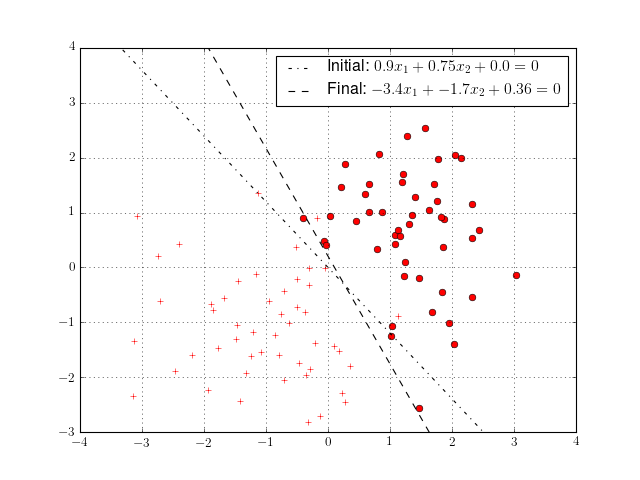

In [13]:
plot.figure()

vis_data(x_tra, y_tra, c='r')
#vis_data(x_tes, y_tes, c='b')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w0)),
        'Final: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w))],
           loc='best')

plot.show()

In [14]:
tra_er = numpy.sum(numpy.abs(numpy.round(logreg(x_tra, w)) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(numpy.round(logreg(x_tes, w)) - y_tes)) / numpy.float(len(y_tes))

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 0.03, Test error rate 0.14
